# Experiments on the Route Optimizing Proplem
## Natrure Inspired Algorithms

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

from GA.Initializer import Heuristic_Initializer, Random_Initializer
from GA.Selector import Roulette_Selector
from GA.Recombiner import Recombiner
from GA.Mutator import Route_Mutator
from GA.Replacer import Replacer
from Task_Initializer import Task
from Evaluator import Evaluator
from Genetic_Alrorithm import Genetic_Alrorithm
from ACO_SORTER import ACO_Sorter
from ACO.ACO_Initializer import ACO_Initializer
from ACO.ACO_SolutionGenerator import SolutionGenerator
from ACO.ACO_Evaporator import Evaporator
from ACO.ACO_Intensificator import Intensificator

### Initialising the Modules and defining the parameters

In [34]:
#initializer = Heuristic_Initializer()
#initializer_name = 'heuristic'
initializer = Random_Initializer()
initializer_name = 'random'
selector = Roulette_Selector()
recombiner = Recombiner()
mutator = Route_Mutator()
replacer = Replacer()
problem = 2
task = Task('problem/{}'.format(problem))
evaluator = Evaluator()

pop_size = 100
offspring_size = 10
mutate_prop = 0.1
iterations = 20
refill_cars = False

aco_iterations = 10
aco_initializer = ACO_Initializer()
aco_solutiongenerator = SolutionGenerator()
aco_evaporator = Evaporator()
aco_intensificator = Intensificator()
sort_with_aco = True
aco_sorter = ACO_Sorter(aco_initializer,
                        aco_solutiongenerator,
                        aco_evaporator,
                        aco_intensificator,
                        task.distance_matrix,
                        aco_iterations)

In [35]:
ga = Genetic_Alrorithm(initializer=initializer,
                       selector=selector,
                       recombiner=recombiner,
                       mutator=mutator,
                       replacer=replacer,
                       evaluator=evaluator,
                       popSize=pop_size,
                       nrOffspring = offspring_size,
                       task=task,
                       mutate_prop=mutate_prop,
                       iterations=iterations,
                       aco_sorter = aco_sorter,
                       aco_sort_step=1,
                       sort_with_aco=sort_with_aco,
                       refill_cars=refill_cars)

INFO:Genetic_Alrorithm:Intitialize population with size 100


## Generating a Heatmap for popsize and offspring size

In [ ]:
## Run the Experiment

In [36]:
solutions = ga.run(logging=False)
df = pd.DataFrame.from_dict(solutions,orient='columns')

INFO:Genetic_Alrorithm:Evaluate Population
INFO:Genetic_Alrorithm:Initial Fitness:			 Mean= 460226.4	Min=354432	Max=593740
INFO:Genetic_Alrorithm:Initial Fitness after ACO Sorting:	 Mean= 457351.4	Min=331968	Max=598754
INFO:Genetic_Alrorithm:Start genetic algorithm with 20 iterations
INFO:Genetic_Alrorithm:

Iteration 0
INFO:Genetic_Alrorithm:Offspring Fitness:			 Mean= 453022.0	Min=374136	Max=519444
INFO:Genetic_Alrorithm:New Fitness of pop:			 Mean= 447646.0	Min=331968	Max=532392
INFO:Genetic_Alrorithm:

Iteration 1
INFO:Genetic_Alrorithm:Offspring Fitness:			 Mean= 479096.3	Min=379728	Max=522431
INFO:Genetic_Alrorithm:New Fitness of pop:			 Mean= 443160.6	Min=331968	Max=522431
INFO:Genetic_Alrorithm:

Iteration 2
INFO:Genetic_Alrorithm:Offspring Fitness:			 Mean= 449943.0	Min=387908	Max=544250
INFO:Genetic_Alrorithm:New Fitness of pop:			 Mean= 436687.7	Min=331968	Max=544250
INFO:Genetic_Alrorithm:

Iteration 3
INFO:Genetic_Alrorithm:Offspring Fitness:			 Mean= 443524.9	Min=421016	M

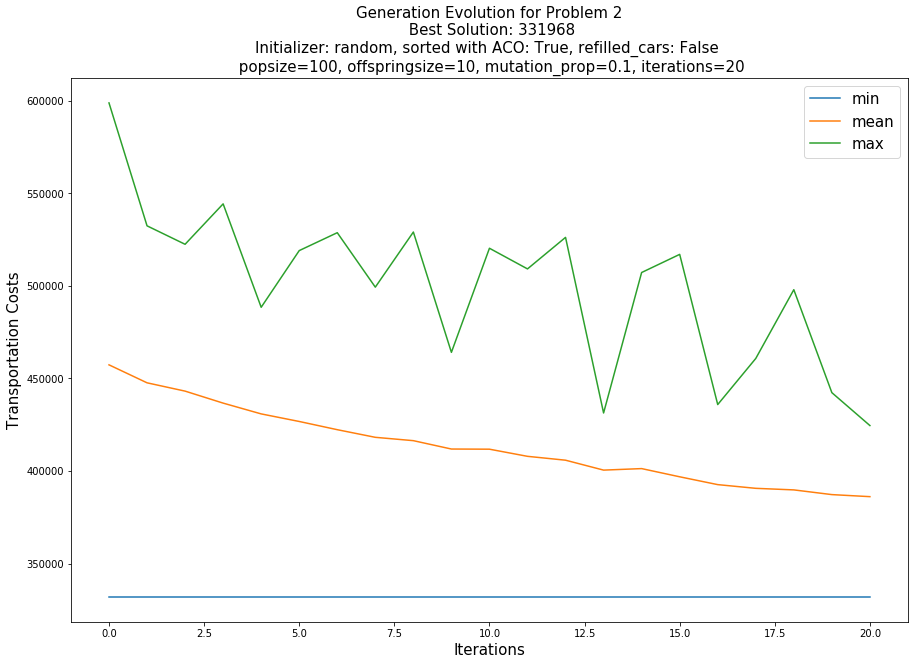

In [37]:
df.aggregate(['min','mean','max']).T.plot(figsize=(15,10))
plt.title('Generation Evolution for Problem {}\n Best Solution: {}\nInitializer: {}, sorted with ACO: {}, refilled_cars: {} \n popsize={}, offspringsize={}, mutation_prop={}, iterations={}'.format(problem,
                                                                                                                                                                                                    np.min(df.values),
                                                                                                                                                                                                    initializer_name,
                                                                                                                                                                                                    sort_with_aco,
                                                                                                                                                                                                    refill_cars,
                                                                                                                                                                                                    pop_size,
                                                                                                                                                                                                    offspring_size,
                                                                                                                                                                                                    mutate_prop,
                                                                                                                                                                                                    iterations),fontsize=15)
plt.xlabel('Iterations',fontsize=15)
plt.ylabel('Transportation Costs',fontsize=15)
plt.legend(fontsize=15)
#plt.show()
plt.savefig('plots/init{}_pop{}_off{}_iter{}_aco{}_refill{}_all'.format(initializer_name,pop_size,offspring_size,iterations,sort_with_aco,refill_cars))
plt.show()

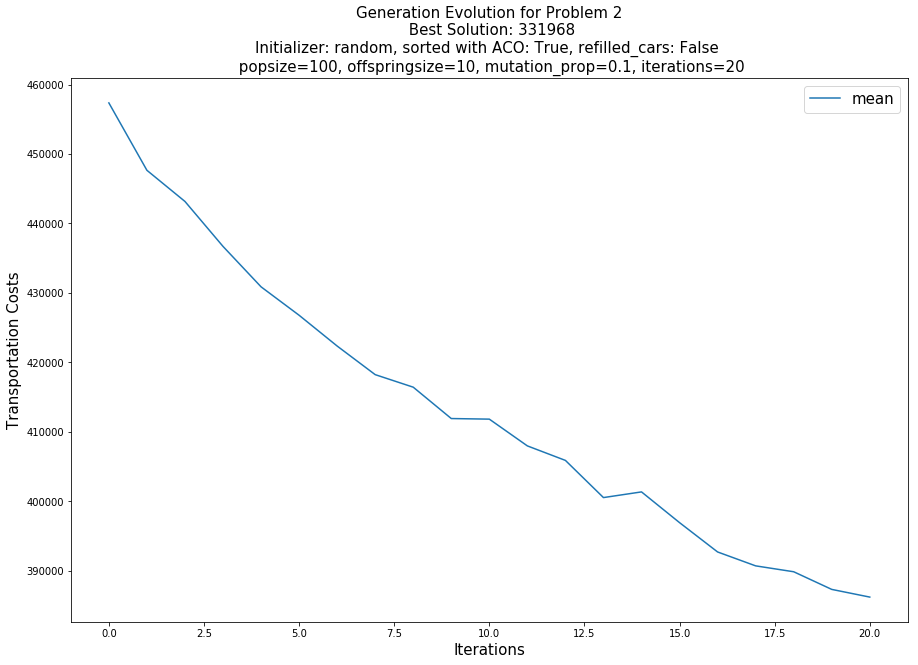

In [38]:
df.aggregate(['mean']).T.plot(figsize=(15,10))
plt.title('Generation Evolution for Problem {}\n Best Solution: {}\nInitializer: {}, sorted with ACO: {}, refilled_cars: {} \n popsize={}, offspringsize={}, mutation_prop={}, iterations={}'.format(problem,
                                                                                                                                                                                                    np.min(df.values),
                                                                                                                                                                                                    initializer_name,
                                                                                                                                                                                                    sort_with_aco,
                                                                                                                                                                                                    refill_cars,
                                                                                                                                                                                                    pop_size,
                                                                                                                                                                                                    offspring_size,
                                                                                                                                                                                                    mutate_prop,
                                                                                                                                                                                                    iterations),fontsize=15)
plt.xlabel('Iterations',fontsize=15)
plt.ylabel('Transportation Costs',fontsize=15)
plt.legend(fontsize=15)
#plt.show()
plt.savefig('plots/prob{}_init{}_pop{}_off{}_iter{}_aco{}_refill_{}mean'.format(problem,initializer_name,pop_size,offspring_size,iterations,sort_with_aco, refill_cars))
plt.show()

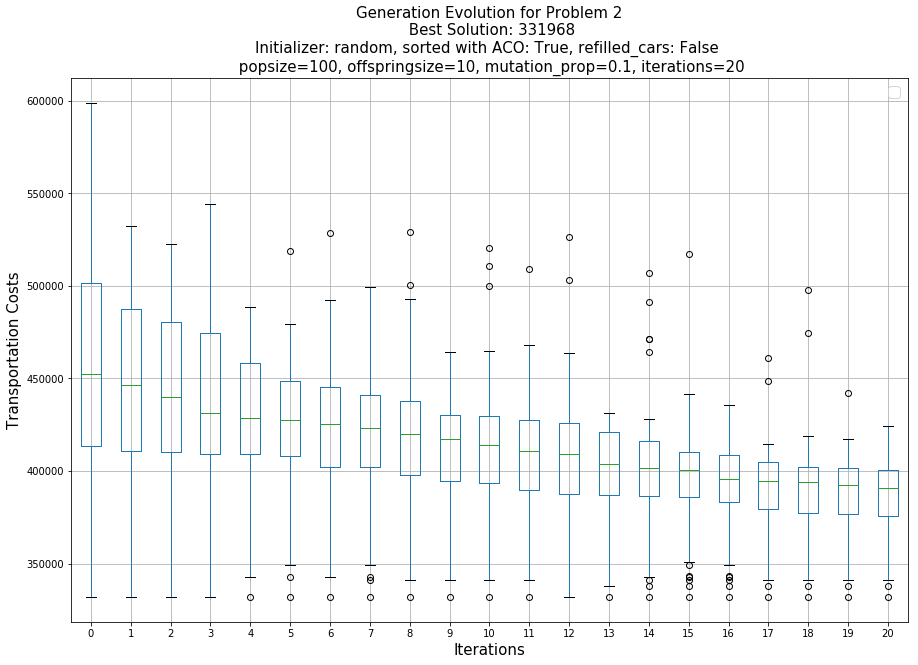

In [39]:
df.boxplot(figsize=(15,10))
plt.title('Generation Evolution for Problem {}\n Best Solution: {}\nInitializer: {}, sorted with ACO: {}, refilled_cars: {} \n popsize={}, offspringsize={}, mutation_prop={}, iterations={}'.format(problem,
                                                                                                                                                                                                    np.min(df.values),
                                                                                                                                                                                                    initializer_name,
                                                                                                                                                                                                    sort_with_aco,
                                                                                                                                                                                                    refill_cars,
                                                                                                                                                                                                    pop_size,
                                                                                                                                                                                                    offspring_size,
                                                                                                                                                                                                    mutate_prop,
                                                                                                                                                                                                    iterations),fontsize=15)
plt.xlabel('Iterations',fontsize=15)
plt.ylabel('Transportation Costs',fontsize=15)
plt.legend(fontsize=15)
#plt.show()
plt.savefig('plots/prob{}_init{}_pop{}_off{}_iter{}_aco{}_refill{}_boxplots'.format(problem,initializer_name,pop_size,offspring_size,iterations,sort_with_aco,refill_cars))
plt.show()